In [1]:
from mainFunctions import *

# Task 1
Perform edge detection on the given images using the Prewitt, Kirsch, Marr-Hildreth, and
Canny edge detection algorithms. Compare the results obtained by each algorithm,
considering factors such as edge quality, noise suppression.

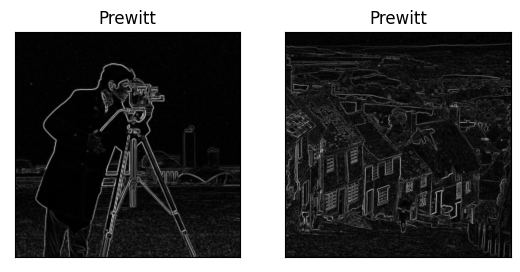

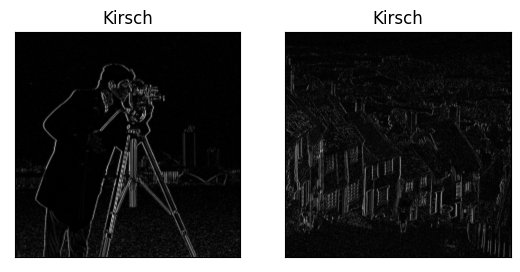

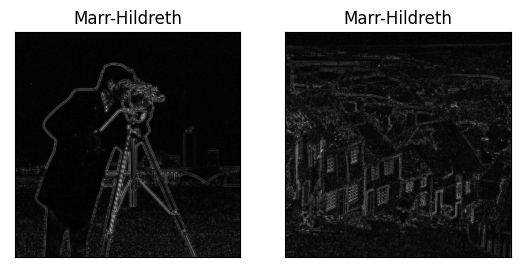

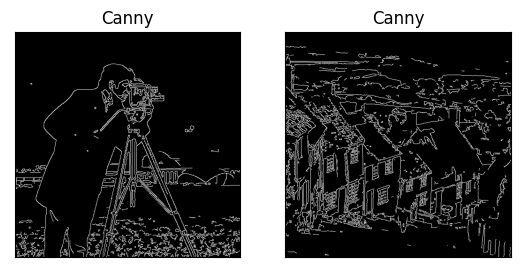

In [2]:
images = load_images('images/1')
prewitt_results = [apply_prewitt(img) for img in images]
kirsch_results = [apply_kirsch(img) for img in images]
marr_hildreth_results = [apply_marr_hildreth(img) for img in images]
canny_results = [apply_canny(img) for img in images]
display_results(prewitt_results, ['Prewitt']*len(images))
display_results(kirsch_results, ['Kirsch']*len(images))
display_results(marr_hildreth_results, ['Marr-Hildreth']*len(images))
display_results(canny_results, ['Canny']*len(images))


# Task 2
Perform color segmentation on the provided images using 8, 16, and 32 colors. After
segmentation, compare the resulting segmented images with each other to analyze the visual
differences and similarities.

3
**cluster with kmeans**
**cluster done**
**cluster with kmeans**
**cluster done**
**cluster with kmeans**
**cluster done**


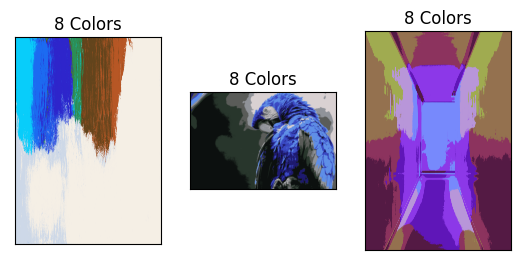

In [2]:
n_colors_list = [8]
segmented_images = []

for n_colors in n_colors_list:
    segmented_images.append([color_segmentation(img, n_colors) for img in images])

for i, n_colors in enumerate(n_colors_list):
    display_results(segmented_images[i], [f'{n_colors} Colors']*len(images))


3
**cluster with kmeans**
**cluster done**
**cluster with kmeans**
**cluster done**
**cluster with kmeans**
**cluster done**


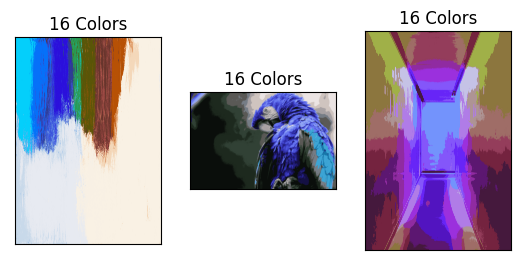

In [2]:
images = load_images('images/2', colorType=cv2.IMREAD_COLOR)
n_colors_list = [16]
segmented_images = []

for n_colors in n_colors_list:
    segmented_images.append([color_segmentation(img, n_colors) for img in images])

for i, n_colors in enumerate(n_colors_list):
    display_results(segmented_images[i], [f'{n_colors} Colors']*len(images))


**cluster with kmeans**
**cluster done**
**cluster with kmeans**
**cluster done**
**cluster with kmeans**
**cluster done**


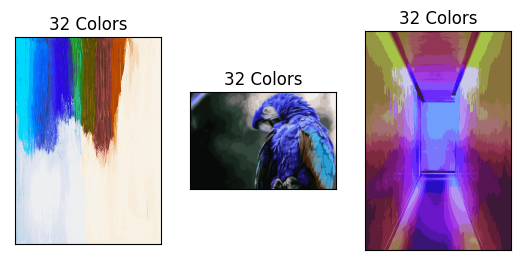

In [3]:
images = load_images('images/2', colorType=cv2.IMREAD_COLOR)
n_colors_list = [32]
segmented_images = []

for n_colors in n_colors_list:
    segmented_images.append([color_segmentation(img, n_colors) for img in images])

for i, n_colors in enumerate(n_colors_list):
    display_results(segmented_images[i], [f'{n_colors} Colors']*len(images))


# Task 3
Apply texture-based segmentation to the given images using Gabor filters. Evaluate the
segmentation results by adjusting the parameters of the Gabor filter and comparing the
segmented images.

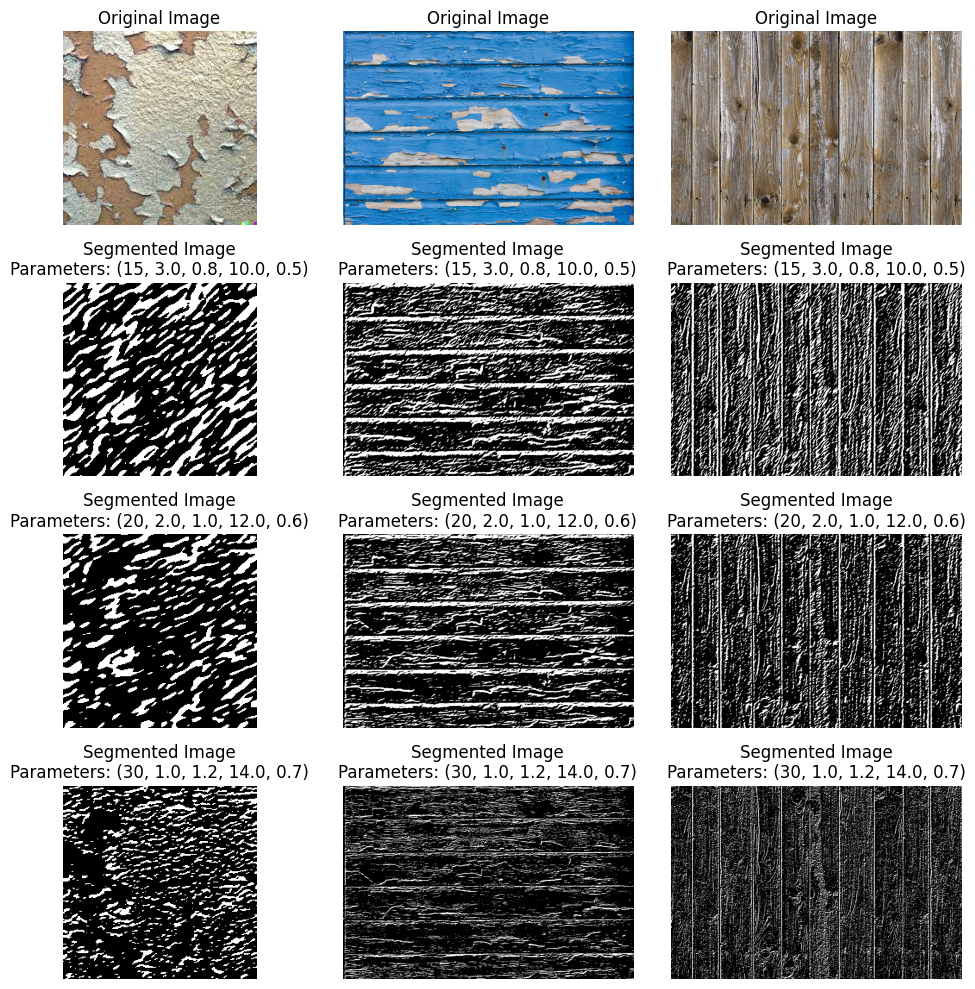

In [35]:
# (Kernel size, Standard deviation of the kernel, Orientation of the kernel, Wavelength of the sinusoidal factor, Spatial aspect ratio)
parameters_list = [
    (15, 3.0, 0.8, 10.0, 0.5),
    (20, 2.0, 1.0, 12.0, 0.6),
    (30, 1.0, 1.2, 14.0, 0.7),
]

fig, axs = plt.subplots(len(parameters_list) + 1, len(os.listdir('images/3')), figsize=(10, 10))

for i, filename in enumerate(os.listdir('images/3')):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join('images/3', filename)
        original_image = cv2.imread(image_path)
        axs[0, i].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        axs[0, i].set_title(f'Original Image')
        axs[0, i].axis('off')
        
        for j, parameters in enumerate(parameters_list):
            ksize, sigma, theta, lambd, gamma = parameters

            # Adjust these parameters to evaluate the segmentation results
            original_image, segmented_image = segment_image(image_path, ksize, sigma, theta, lambd, gamma)

            # Display the segmented image
            axs[j + 1, i].imshow(segmented_image, cmap='gray')
            axs[j + 1, i].set_title(f'Segmented Image\nParameters: {parameters}')
            axs[j + 1, i].axis('off')

plt.tight_layout()
plt.show()


# Task 4
Generate and display the Histogram of Oriented Gradients (HOG) images for the given
pictures. Evaluate and compare the HOG representations by adjusting parameters and
visualizing the resulting images.

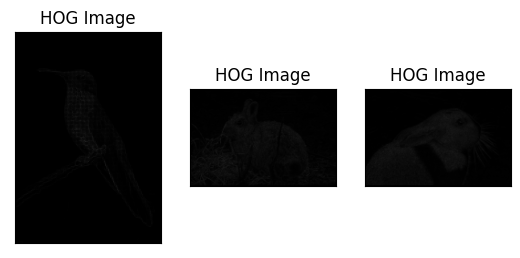

In [18]:
images = load_images("images/4")

hog_images = []
titles = []

for image in images:
    _, hog_image = compute_hog(image)
    hog_images.append(hog_image)
    titles.append('HOG Image')

display_results(hog_images, titles)


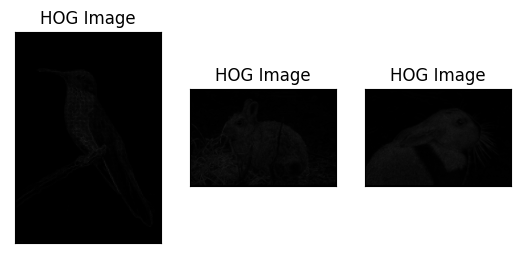

In [25]:
hog_images = []
titles = []

for image in images:
    _, hog_image = compute_hog(image, orientations=2, pixels_per_cell=(8, 8), cells_per_block=(4, 4))
    hog_images.append(hog_image)
    titles.append('HOG Image')

display_results(hog_images, titles=titles)


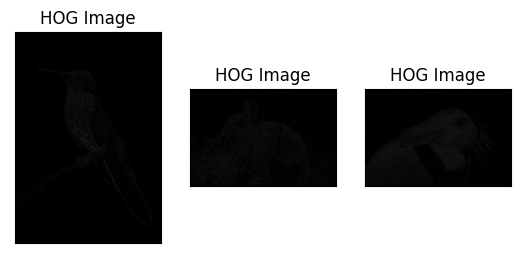

In [23]:
hog_images = []
titles = []

for image in images:
    _, hog_image = compute_hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))
    hog_images.append(hog_image)
    titles.append('HOG Image')

display_results(hog_images, titles=titles)


# Task 5
Utilize the Sift algorithm for scene stitching, showcasing the matching process and creating
panoramic images. Evaluate the effectiveness of the SURF algorithm by adjusting parameters
and visualizing the stitched panorama images.

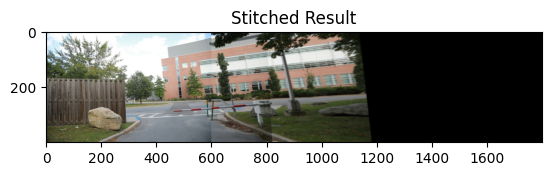

In [3]:
# Load three images
image1 = cv2.imread('images/5/sl.jpg')
image2 = cv2.imread('images/5/sm.jpg')
image3 = cv2.imread('images/5/sr.jpg')

# Stitch the images
stitched_result = stitch_images([image3, image2, image1])

if stitched_result is not None:
    # Display the final stitched result
    plt.imshow(cv2.cvtColor(stitched_result, cv2.COLOR_BGR2RGB)), plt.title("Stitched Result"), plt.show()



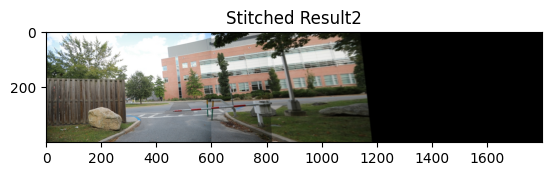

In [5]:
# Stitch the images
stitched_result = stitch_images([image3, image2, image1], ratio_threshold=0.9, min_match_count=400)

if stitched_result is not None:
    # Display the final stitched result
    plt.imshow(cv2.cvtColor(stitched_result, cv2.COLOR_BGR2RGB)), plt.title("Stitched Result2"), plt.show()


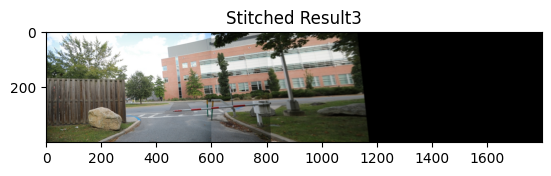

In [6]:
# Stitch the images
stitched_result = stitch_images([image3, image2, image1], ratio_threshold=0.3, min_match_count=4)

if stitched_result is not None:
    # Display the final stitched result
    plt.imshow(cv2.cvtColor(stitched_result, cv2.COLOR_BGR2RGB)), plt.title("Stitched Result3"), plt.show()


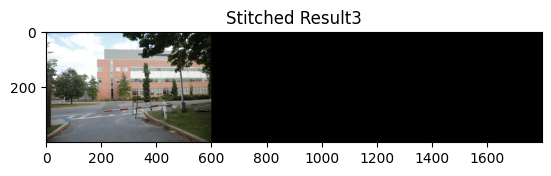

In [7]:
# Stitch the images
stitched_result = stitch_images([image1, image2, image3], ratio_threshold=0.75, min_match_count=4)

if stitched_result is not None:
    # Display the final stitched result
    plt.imshow(cv2.cvtColor(stitched_result, cv2.COLOR_BGR2RGB)), plt.title("Stitched Result3"), plt.show()


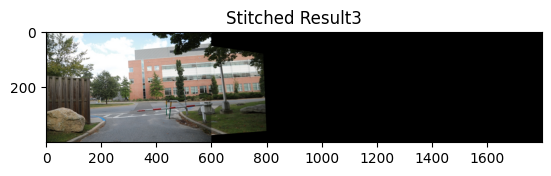

In [8]:
# Stitch the images
stitched_result = stitch_images([image3, image1, image2], ratio_threshold=0.75, min_match_count=4)

if stitched_result is not None:
    # Display the final stitched result
    plt.imshow(cv2.cvtColor(stitched_result, cv2.COLOR_BGR2RGB)), plt.title("Stitched Result3"), plt.show()
